<a href="https://colab.research.google.com/github/Dhanashree3329/Airbnb3329/blob/main/Airbnb3329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

In [5]:
airbnb_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv")

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#e can fill these missing values in both with unknown & no_name respectively!

airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)

In [ ]:
airbnb_df.reviews_per_month.fillna(0, inplace=True)

In [ ]:
airbnb_df[['host_name','name','reviews_per_month']].isnull().values.any() #looks the null values are removed!

False

In [ ]:
airbnb_df= airbnb_df.drop(['last_review'],axis=1)

In [ ]:
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [7]:
#  fill these missing values in both with unknown & no_name respectively!

airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)

In [8]:
airbnb_df.reviews_per_month.fillna(0, inplace=True)



In [9]:
#looks the null values are removed!
airbnb_df[['host_name','name','reviews_per_month']].isnull().values.any() 

False

In [10]:
airbnb_df= airbnb_df.drop(['last_review'],axis=1)

In [11]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

# no duplicate data present as it **seems**

In [13]:
#  describe the price
airbnb_df['price']

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [15]:
# lets describe the price
airbnb_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

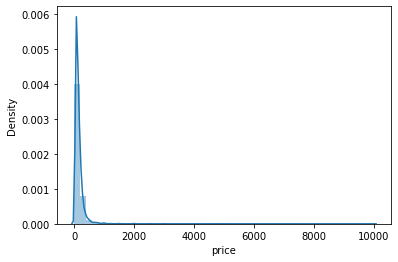

In [16]:
#histogram
sns.distplot(airbnb_df['price']);

The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.

**Explore our data and visualize it to recognize the relationship between the dataset.**

**bold text**

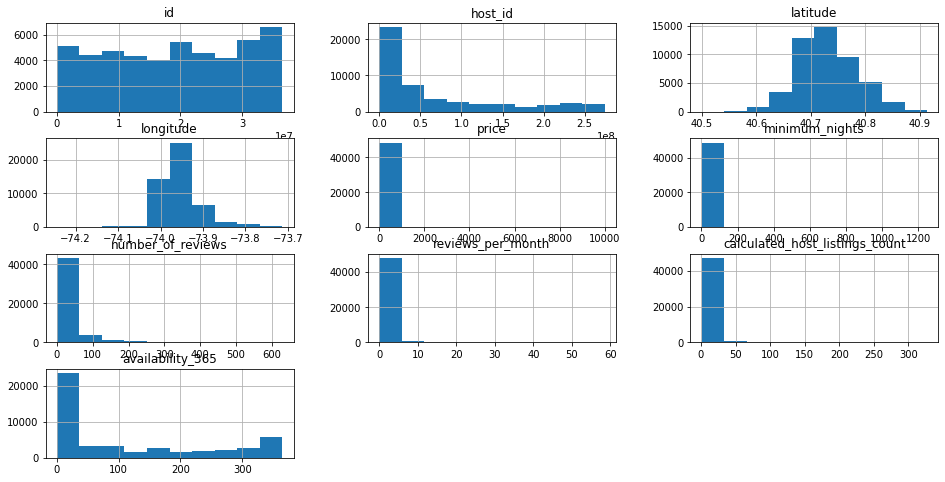

In [17]:
airbnb_df.hist(figsize=(16,8))
plt.show()

In [18]:
#avg price for different type of room type
avg_price=airbnb_df.groupby('room_type')['price'].median().reset_index()

In [19]:
avg_price['price']=avg_price['price'].apply(lambda x:"{0:1.0f}$".format(x))

In [20]:
avg_price

,room_type,price
0,Entire home/apt,160$
1,Private room,70$
2,Shared room,45$


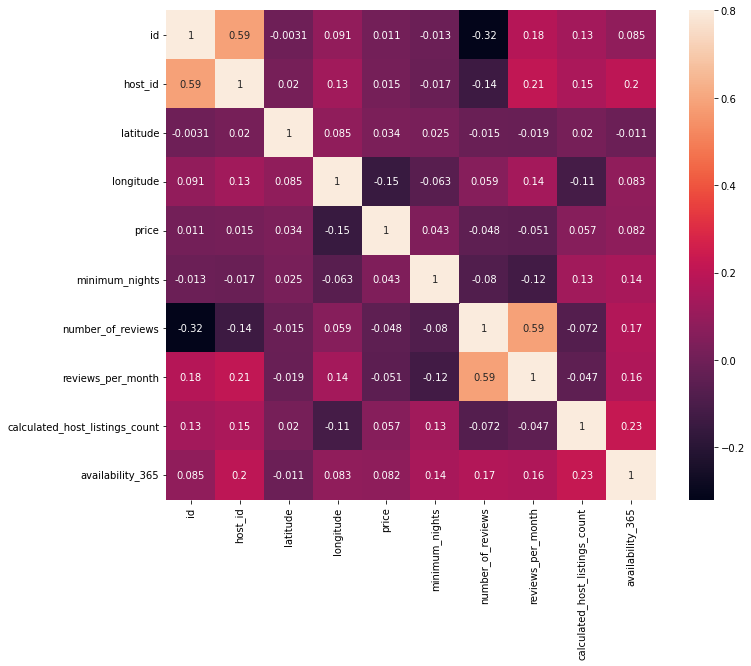

In [21]:
# correlation matrix
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

**bold tAccording to our crystal ball, these are the variables most correlated with 'SalePrice'.where 'sale price' is dependend variable which depends on various factors like room type,avaibility of room ,number of reviews,reviews per month.

Based on our price heat map observation, we need to visualize the price distribution using a box plot to understand more on the listing price range grouped by the ‘neighbourhood_group’ /region area.

There’s correlation among host_id to reveiws_per_month & availability_365 (sequential color bar is used between value and color). Also there’s noticiable correlation between min_nights, no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count. no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

ext**